In [76]:
import numpy as np
import matplotlib.pyplot as plt

def my_dynamics(x):
    """
    Equation: a * d²x/dt² + b * dx/dt + c * x = d
    State vector x = [x, dx/dt]
    """
    a, b, c, d = 4.01, -0.1, -4.59, 7.41
    x0, dx = x[0], x[1]
    dxdx = (d - b*dx - c*x0) / a
    return np.array([dx, dxdx])


def forward_euler(fun, x0, Tf, h):
    """
    Explicit Euler integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])
    
    return x_hist, t


def backward_euler(fun, x0, Tf, h, tol=1e-8, max_iter=100):
    """
    Implicit Euler integration method using fixed-point iteration
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k]  # Initial guess
        
        for i in range(max_iter):
            x_next = x_hist[:, k] + h * fun(x_hist[:, k + 1])
            error = np.linalg.norm(x_next - x_hist[:, k + 1])
            x_hist[:, k + 1] = x_next
            
            if error < tol:
                break
    
    return x_hist, t


def runge_kutta4(fun, x0, Tf, h):
    """
    4th order Runge-Kutta integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        k1 = fun(x_hist[:, k])
        k2 = fun(x_hist[:, k] + 0.5 * h * k1)
        k3 = fun(x_hist[:, k] + 0.5 * h * k2)
        k4 = fun(x_hist[:, k] + h * k3)
        
        x_hist[:, k + 1] = x_hist[:, k] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    
    return x_hist, t


def analytical_solution(C: list[float], Tf: float, h: float):
    assert len(C) == 2, "C must be represented as [C1, C2]"
    t = np.arange(0, Tf + h, h)
    a, b, c, d = 4.01, -0.1, -4.59, 7.41
    c1, c2 = C
    D_sqrt = np.sqrt(b*b - 4*a*c)
    alpha = (-b + D_sqrt) / (2*a)
    beta = (-b - D_sqrt) / (2*a)
    x = d/c + c1 * np.exp(t * alpha) + c2 * np.exp(t * beta)
    dx = alpha * c1 * np.exp(t * alpha) + beta * c2 * np.exp(t * beta)
    return x, dx, t


def draw_plot(x: list, y: list, legend_labels: list, xlabel: str, ylabel: str, title: str):
    assert len(x) == len(y) == len(legend_labels)
    plt.figure(figsize=(8, 6))
    for xi, yi, labeli in zip(x, y, legend_labels):
        plt.plot(xi, yi, label=labeli)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend()
        plt.title(title)
    plt.show()

In [70]:
# Test all integrators
x0 = np.array([0.0, 0.0])  # Initial state: [position, velocity]
Tf = 5.0
h = 0.001
C = [0.9131728740073495, 0.9347074249926506]  # Analytical solution constants set
# C = [0.7980, 0.8167]

# Forward Euler
x_fe, t_fe = forward_euler(my_dynamics, x0, Tf, h)

# Backward Euler  
x_be, t_be = backward_euler(my_dynamics, x0, Tf, h)

# Runge-Kutta 4
x_rk4, t_rk4 = runge_kutta4(my_dynamics, x0, Tf, h)

# Analytical solution
x_as, dx_as, t_as = analytical_solution(C, Tf, h)

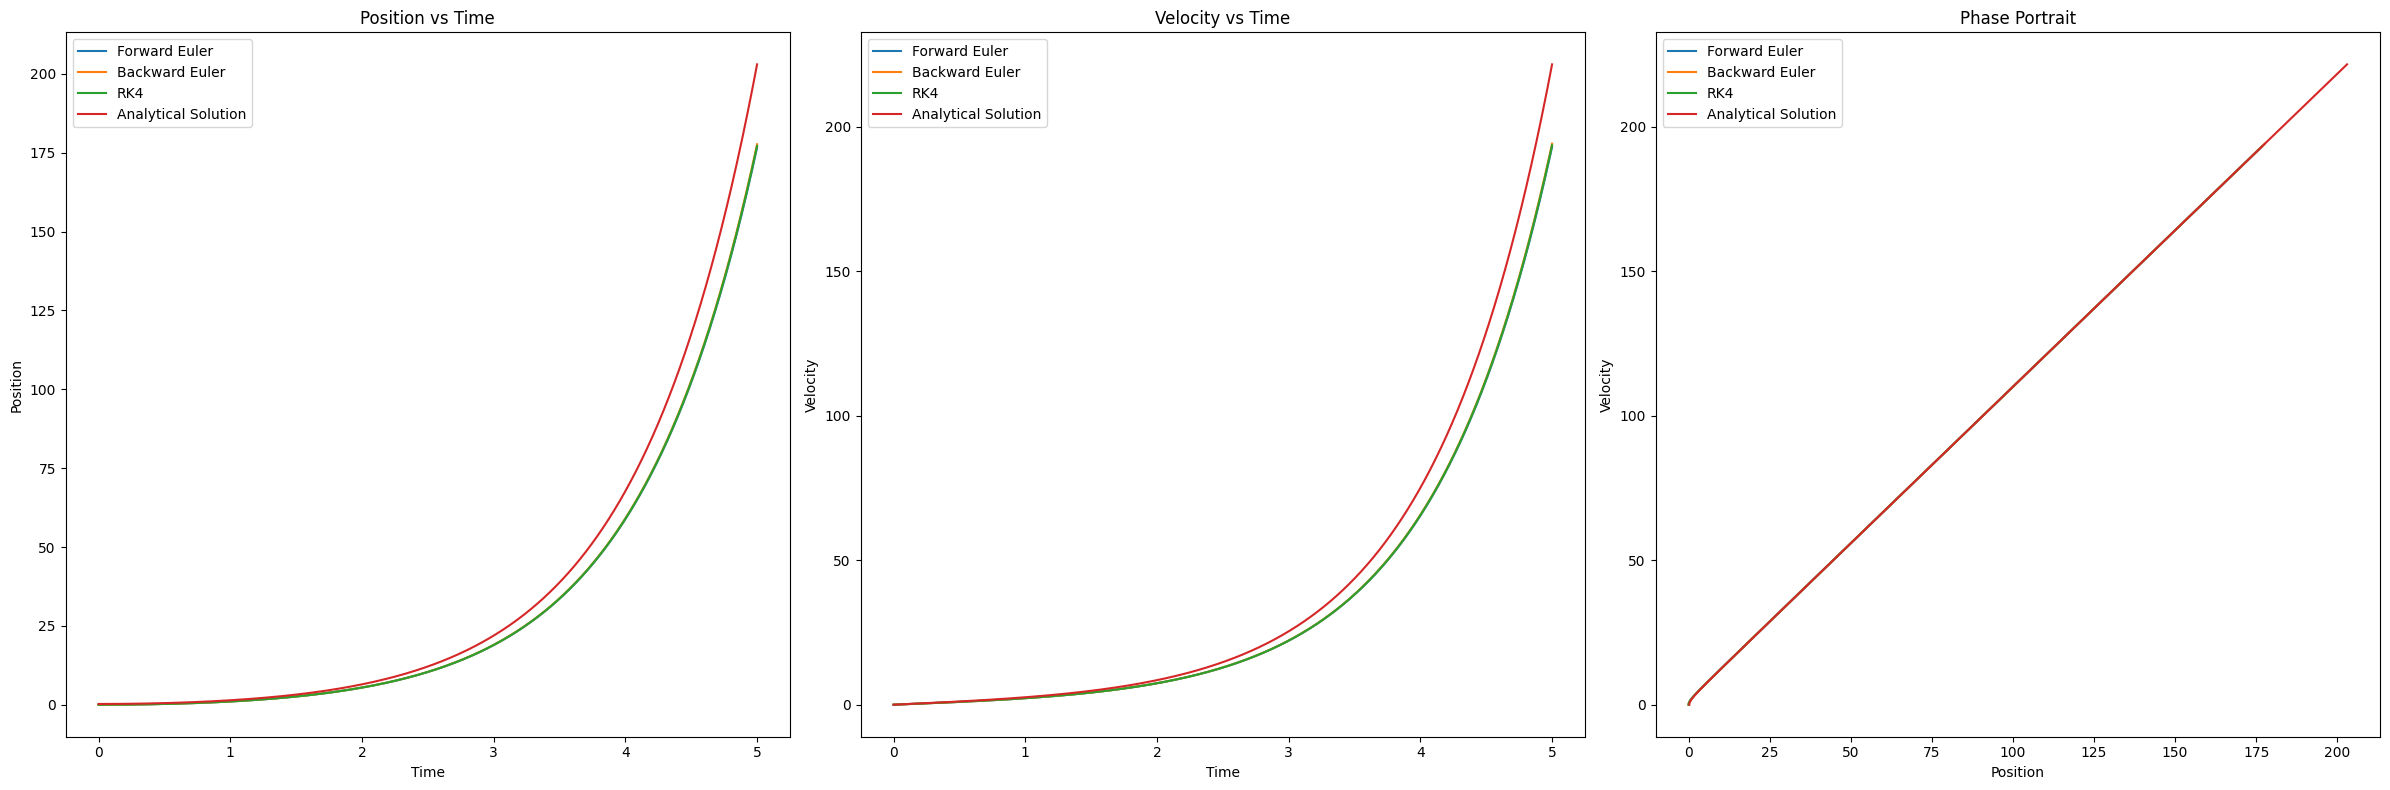

In [82]:
# Plot results
plt.figure(figsize=(24, 8))

plt.subplot(1, 3, 1)
plt.plot(t_fe, x_fe[0, :], label='Forward Euler')
plt.plot(t_be, x_be[0, :], label='Backward Euler')
plt.plot(t_rk4, x_rk4[0, :], label='RK4')
plt.plot(t_as, x_as, label="Analytical Solution")
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.title('Position vs Time')

plt.subplot(1, 3, 2)
plt.plot(t_fe, x_fe[1, :], label='Forward Euler')
plt.plot(t_be, x_be[1, :], label='Backward Euler') 
plt.plot(t_rk4, x_rk4[1, :], label='RK4')
plt.plot(t_as, dx_as, label="Analytical Solution")
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()
plt.title('Velocity vs Time')

plt.subplot(1, 3, 3)
plt.plot(x_fe[0, :], x_fe[1, :], label='Forward Euler')
plt.plot(x_be[0, :], x_be[1, :], label='Backward Euler')
plt.plot(x_rk4[0, :], x_rk4[1, :], label='RK4')
plt.plot(x_as, dx_as, label="Analytical Solution")
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.legend()
plt.title('Phase Portrait')

plt.tight_layout()
plt.show()

In [29]:
a = -1.847880299
b = 1.082419236
c = -1.05748158

c2 = a*b / (c - b)
c1 = -c2 - a

print(c1)
print(c2)

0.9131728740073495
0.9347074249926506


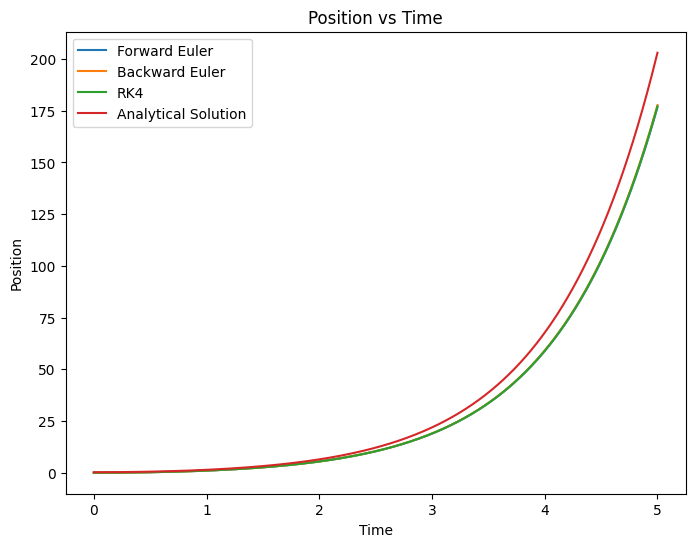

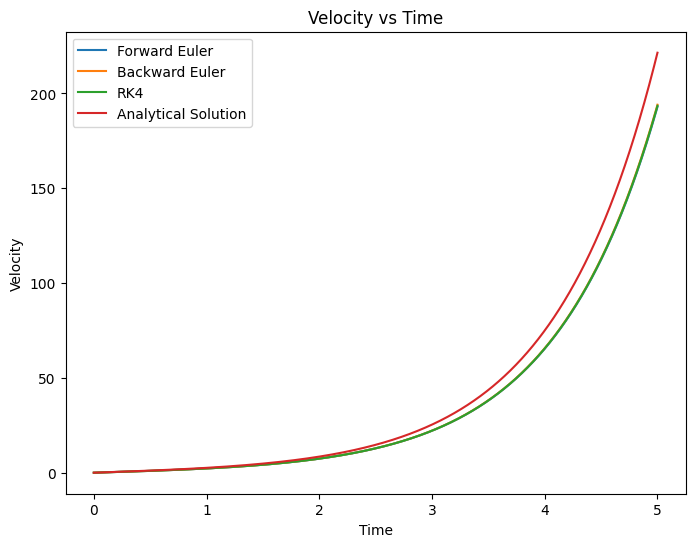

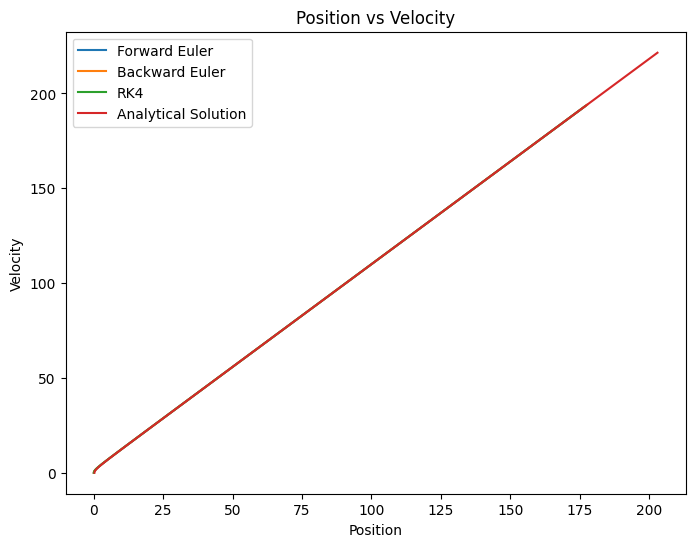

In [85]:
draw_plot(
    [t_fe, t_be, t_rk4, t_as],
    [x_fe[0, :], x_be[0, :], x_rk4[0, :], x_as],
    ['Forward Euler', 'Backward Euler', 'RK4', 'Analytical Solution'],
    'Time', 'Position', 'Position vs Time'
)

draw_plot(
    [t_fe, t_be, t_rk4, t_as],
    [x_fe[1, :], x_be[1, :], x_rk4[1, :], dx_as],
    ['Forward Euler', 'Backward Euler', 'RK4', 'Analytical Solution'],
    'Time', 'Velocity', 'Velocity vs Time'
)

draw_plot(
    [x_fe[0, :], x_be[0, :], x_rk4[0, :], x_as],
    [x_fe[1, :], x_be[1, :], x_rk4[1, :], dx_as],
    ['Forward Euler', 'Backward Euler', 'RK4', 'Analytical Solution'],
    'Position', 'Velocity', 'Position vs Velocity'
)